In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from toy_model import *
import sys 
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR

In [4]:
data_model = diffusion_equation()
dataset = data_model.generate_training_data(500, 10, dlt_t = 0.001)

In [98]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam

data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define a simple model with a single trainable parameter `k`
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.k = nn.Parameter(torch.randn(()))  # Initialize k as a parameter

    def forward(self, lace_1, lace_2):
        g = lace_1
        h = self.k * lace_1 + lace_2
        return g, h

model = SimpleModel()

In [99]:
def custom_loss(g, h):
    """
    Custom loss function as defined.

    Parameters:
    - g: Tensor, corresponding to `lace_1` in the context.
    - h: Tensor, calculated as `k * lace_1 + lace_2` from the model.

    Returns:
    - loss: Computed custom loss as a single scalar tensor.
    """
    numerator = torch.sum(h * g) ** 2
    denominator = torch.sum(h ** 2) * torch.sum(g ** 2)
    loss = numerator / denominator
    return loss

In [100]:
def train_one_epoch(model, optimizer, scheduler, train_loader, epoch):
    model.train()  # Set model to training mode
    total_loss = 0.0

    # Iterate over batches
    for batch_idx, (_, _, lace_1, lace_2) in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients

        _, _, lace_1, lace_2 = batch

        # Compute g and h using your model. This is model-specific and might look different.
        g, h = model(lace_1, lace_2)

        # Compute the custom loss
        loss = custom_loss(g, h)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

    scheduler.step()
    avg_loss = total_loss / len(train_loader)
    print(f"Training Epoch: {epoch+1}, Average Loss: {avg_loss:.4e}")
    return avg_loss


In [101]:
# Define optimizer
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 500
scheduler = StepLR(optimizer, step_size=50, gamma=0.8)

In [102]:
train_loss_history = []
para_history = []
for epoch in range(epochs):
    train_loss = train_one_epoch(model, optimizer, scheduler, data_loader, epoch)
    train_loss_history.append(train_loss)
    para_history.append(model.k.clone().detach().numpy())


Epoch 1, Batch 0/79, Loss: 0.0997
Training Epoch: 1, Average Loss: 7.4297e-02
Epoch 2, Batch 0/79, Loss: 0.0512
Training Epoch: 2, Average Loss: 3.4960e-02
Epoch 3, Batch 0/79, Loss: 0.0214
Training Epoch: 3, Average Loss: 1.3316e-02
Epoch 4, Batch 0/79, Loss: 0.0071
Training Epoch: 4, Average Loss: 4.0581e-03
Epoch 5, Batch 0/79, Loss: 0.0019
Training Epoch: 5, Average Loss: 9.8706e-04
Epoch 6, Batch 0/79, Loss: 0.0004
Training Epoch: 6, Average Loss: 1.9192e-04
Epoch 7, Batch 0/79, Loss: 0.0001
Training Epoch: 7, Average Loss: 2.9854e-05
Epoch 8, Batch 0/79, Loss: 0.0000
Training Epoch: 8, Average Loss: 3.7078e-06
Epoch 9, Batch 0/79, Loss: 0.0000
Training Epoch: 9, Average Loss: 3.6592e-07
Epoch 10, Batch 0/79, Loss: 0.0000
Training Epoch: 10, Average Loss: 2.8510e-08
Epoch 11, Batch 0/79, Loss: 0.0000
Training Epoch: 11, Average Loss: 1.7349e-09
Epoch 12, Batch 0/79, Loss: 0.0000
Training Epoch: 12, Average Loss: 8.0899e-11
Epoch 13, Batch 0/79, Loss: 0.0000
Training Epoch: 13, Ave

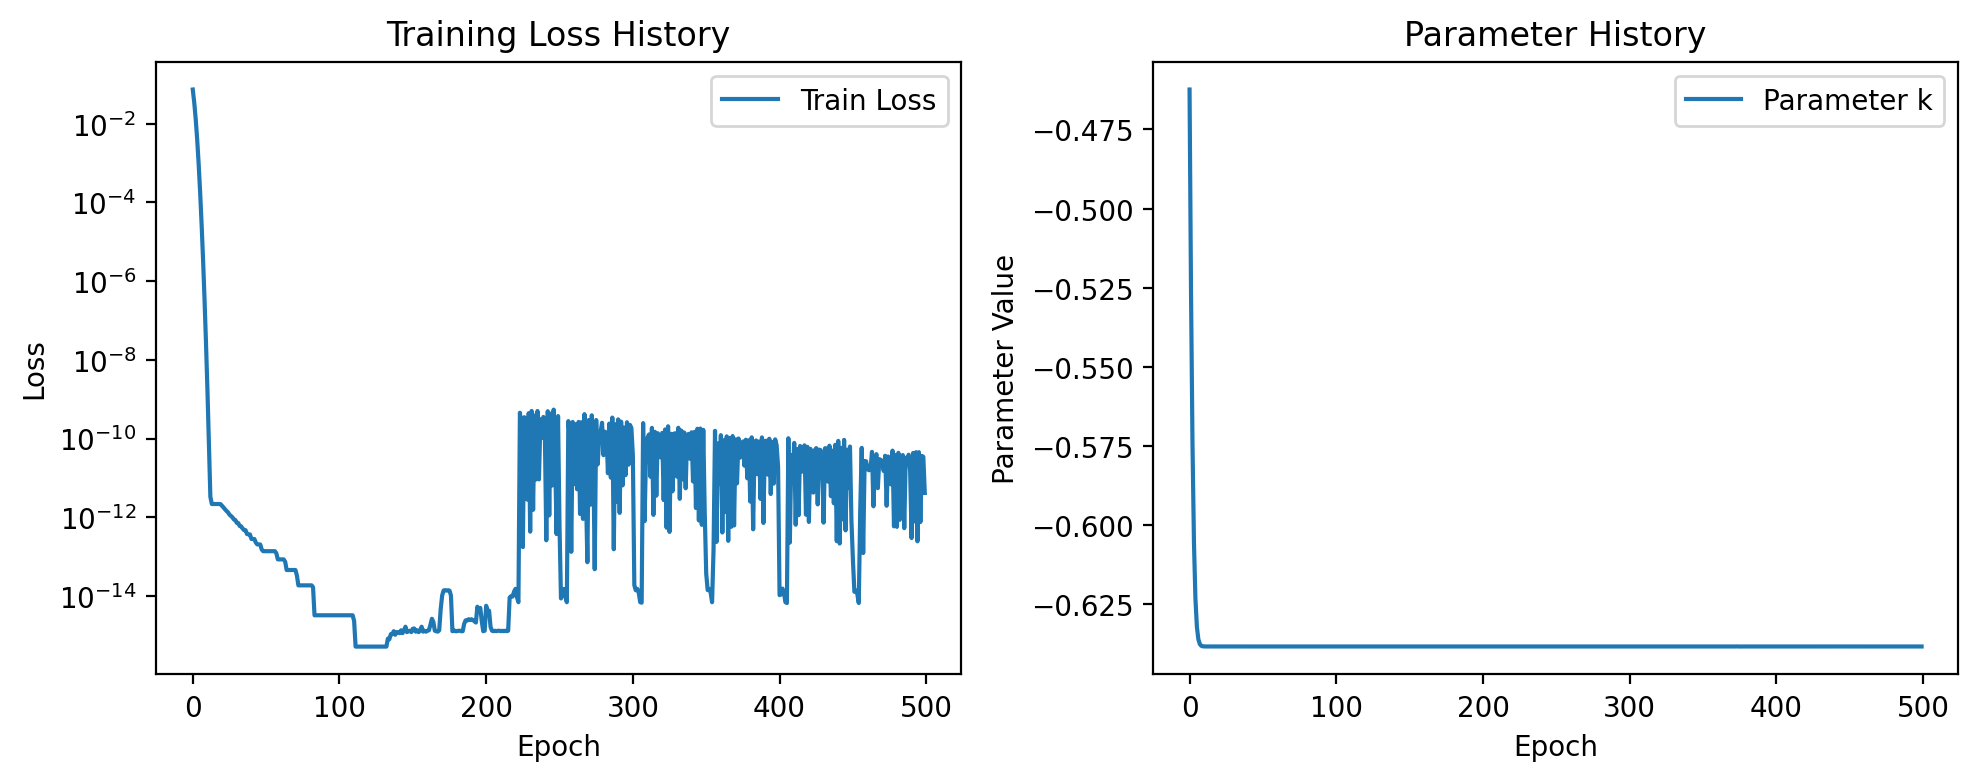

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(train_loss_history, label='Train Loss')
plt.title('Training Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

# Plotting parameter history
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(para_history, label='Parameter k')
plt.title('Parameter History')
plt.xlabel('Epoch')
plt.ylabel('Parameter Value')
# plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()